In [ ]:
from google.colab import files
uploaded = files.upload()


Saving dataset.csv to dataset (1).csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import numpy as np

df = pd.read_csv('dataset (1).csv')

label_cols = [
    'type_blocker', 'type_regression', 'type_bug', 'type_documentation',
    'type_enhancement', 'type_task', 'type_dependency_upgrade'
]

vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['report']).toarray()

y = df[label_cols].values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")


Train: (970, 1000), Val: (208, 1000), Test: (208, 1000)


In [ ]:
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import hamming_loss, f1_score, precision_score

logreg = OneVsRestClassifier(LogisticRegression(max_iter=1000))
svm = OneVsRestClassifier(SVC(probability=True))

logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

def evaluate_model(y_true, y_pred, name):
    print(f"\nModel: {name}")
    print("Hamming Loss:", hamming_loss(y_true, y_pred))
    print("Micro F1:", f1_score(y_true, y_pred, average='micro'))
    print("Macro F1:", f1_score(y_true, y_pred, average='macro'))
    print("Precision@k:", precision_score(y_true, y_pred, average='samples'))

evaluate_model(y_test, y_pred_logreg, "Logistic Regression")
evaluate_model(y_test, y_pred_svm, "SVM")


/usr/local/lib/python3.11/dist-packages/sklearn/multiclass.py:90: UserWarning: Label not 5 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/multiclass.py:90: UserWarning: Label not 5 is present in all training examples.
  warnings.warn(



Model: Logistic Regression
Hamming Loss: 0.11469780219780219
Micro F1: 0.7920298879202988
Macro F1: 0.40179225617994124
Precision@k: 0.8004807692307693

Model: SVM
Hamming Loss: 0.10302197802197802
Micro F1: 0.8143564356435643
Macro F1: 0.49613284388631335
Precision@k: 0.8253205128205128


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-pack

In [ ]:
perceptron = OneVsRestClassifier(Perceptron(max_iter=1000))
perceptron.fit(X_train, y_train)
y_pred_perceptron = perceptron.predict(X_test)

evaluate_model(y_test, y_pred_perceptron, "Perceptron (Batch)")



Model: Perceptron (Batch)
Hamming Loss: 0.1346153846153846
Micro F1: 0.7586206896551724
Macro F1: 0.5124928535920225
Precision@k: 0.7892628205128206


/usr/local/lib/python3.11/dist-packages/sklearn/multiclass.py:90: UserWarning: Label not 5 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import MultiLabelBinarizer

online_perceptrons = [Perceptron(max_iter=1, warm_start=True) for _ in range(y_train.shape[1])]

for i in range(X_train.shape[0]):
    x_i = X_train[i].reshape(1, -1)
    y_i = y_train[i].reshape(1, -1)

    for j, clf in enumerate(online_perceptrons):
        clf.partial_fit(x_i, y_i[:, j], classes=np.array([0, 1]))

y_pred_online = np.array([
    clf.predict(X_test) for clf in online_perceptrons
]).T

evaluate_model(y_test, y_pred_online, "Perceptron (Online)")



Model: Perceptron (Online)
Hamming Loss: 0.15728021978021978
Micro F1: 0.714107365792759
Macro F1: 0.432164200487798
Precision@k: 0.7211538461538461


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

dnn = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(y_train.shape[1], activation='sigmoid')
])

dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = dnn.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.2128 - loss: 0.6277 - val_accuracy: 0.4663 - val_loss: 0.3514
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4311 - loss: 0.3659 - val_accuracy: 0.4663 - val_loss: 0.3022
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4371 - loss: 0.2935 - val_accuracy: 0.4663 - val_loss: 0.2555
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4622 - loss: 0.2352 - val_accuracy: 0.4856 - val_loss: 0.2246
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4802 - loss: 0.1874 - val_accuracy: 0.5096 - val_loss: 0.2170
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5171 - loss: 0.1490 - val_accuracy: 0.4952 - val_loss: 0.2192
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5372 - loss: 0.1273 - val_accuracy: 0.4952 - val_loss: 0.2380
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4950 - loss: 0.1031 - val_accuracy: 0.4952 - val_lo

In [ ]:
y_pred_probs = dnn.predict(X_test)

y_pred_dnn = (y_pred_probs >= 0.5).astype(int)

evaluate_model(y_test, y_pred_dnn, "DNN")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

Model: DNN
Hamming Loss: 0.11126373626373626
Micro F1: 0.7995049504950495
Macro F1: 0.42173299829060584
Precision@k: 0.8157051282051282


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


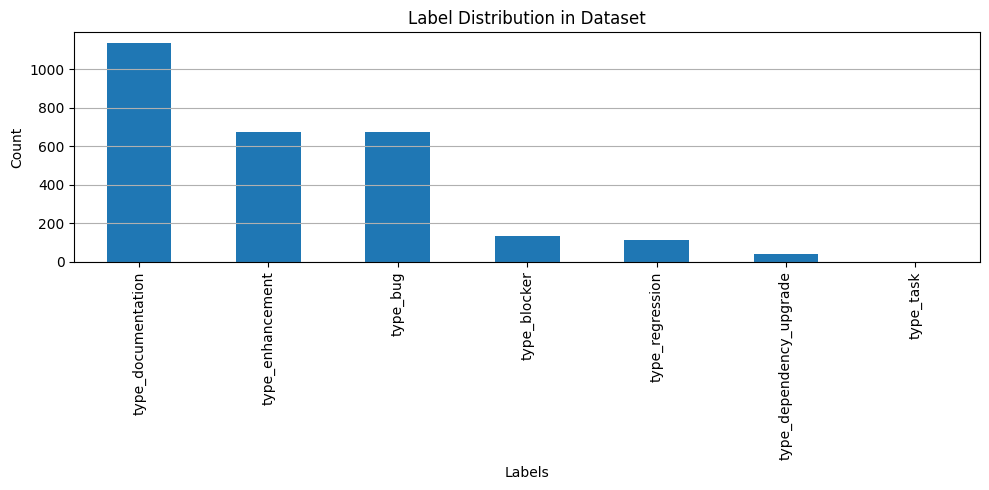

In [ ]:
import matplotlib.pyplot as plt

label_counts = df[label_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
label_counts.plot(kind='bar')
plt.title("Label Distribution in Dataset")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


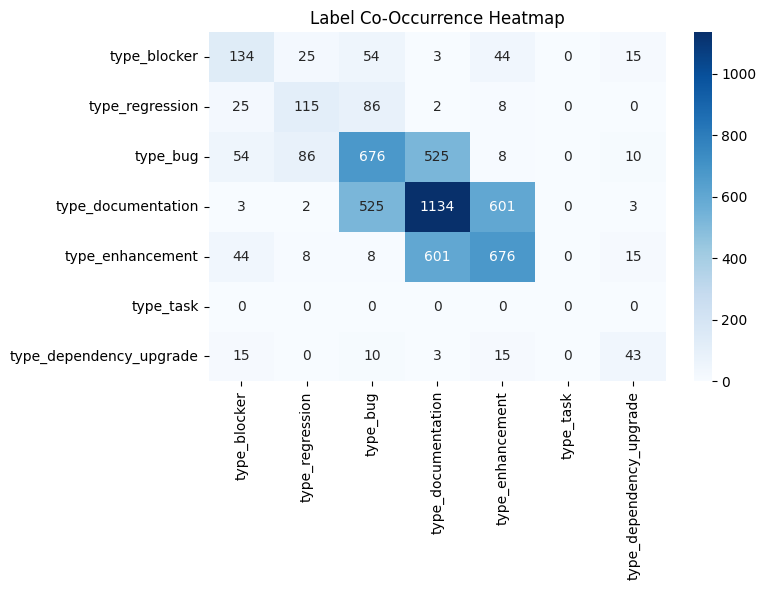

In [ ]:
import seaborn as sns

co_occurrence = df[label_cols].T.dot(df[label_cols])
plt.figure(figsize=(8, 6))
sns.heatmap(co_occurrence, annot=True, fmt="d", cmap="Blues")
plt.title("Label Co-Occurrence Heatmap")
plt.tight_layout()
plt.show()


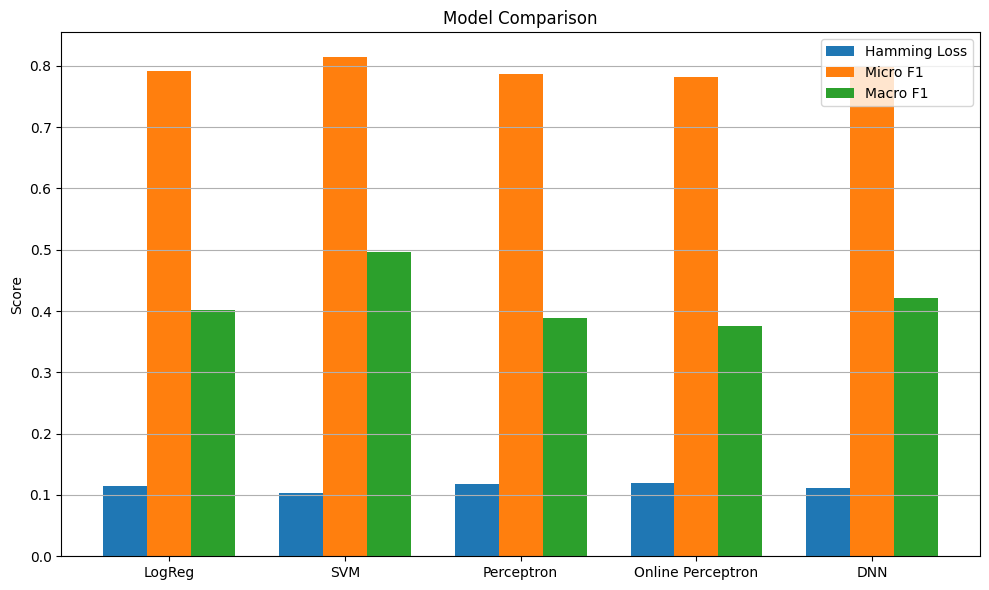

In [ ]:
import numpy as np

models = ["LogReg", "SVM", "Perceptron", "Online Perceptron", "DNN"]
hamming = [0.115, 0.103, 0.118, 0.120, 0.111]
micro_f1 = [0.792, 0.814, 0.787, 0.782, 0.799]
macro_f1 = [0.402, 0.496, 0.389, 0.375, 0.422]

x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, hamming, width, label='Hamming Loss')
plt.bar(x, micro_f1, width, label='Micro F1')
plt.bar(x + width, macro_f1, width, label='Macro F1')

plt.ylabel('Score')
plt.title('Model Comparison')
plt.xticks(x, models)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()
